In [1]:
import os
import findspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from handyspark import *
from matplotlib import pyplot as plt

findspark.init()
os.environ['PYSPARK_SUBMIT_ARGS'] = '--master local[*] pyspark-shell'

%matplotlib inline

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
sdf = spark.read.csv('train.csv', header=True, inferSchema=True)

In [4]:
hdf = sdf.toHandy()

In [5]:
hdf.isnull()

PassengerId      0.0
Survived         0.0
Pclass           0.0
Name             0.0
Sex              0.0
Age            177.0
SibSp            0.0
Parch            0.0
Ticket           0.0
Fare             0.0
Cabin          687.0
Embarked         2.0
Name: missing, dtype: float64

In [6]:
hdf_filled = hdf.fill(categorical=['Embarked'], continuous=['Age'])

In [7]:
hdf_filled.isnull()

PassengerId      0.0
Survived         0.0
Pclass           0.0
Name             0.0
Sex              0.0
Age              0.0
SibSp            0.0
Parch            0.0
Ticket           0.0
Fare             0.0
Cabin          687.0
Embarked         0.0
Name: missing, dtype: float64

In [8]:
hdf_filled.statistics_

{'Age': 29.69911764705882, 'Embarked': 'S'}

In [9]:
imputer = hdf_filled.transformers.imputer()
imputer.getDictValues()

{'Age': 29.69911764705882, 'Embarked': 'S'}

In [10]:
hdf_filled.outliers()

PassengerId      0.0
Survived         0.0
Pclass           0.0
Age             66.0
SibSp           46.0
Parch          213.0
Fare           116.0
dtype: float64

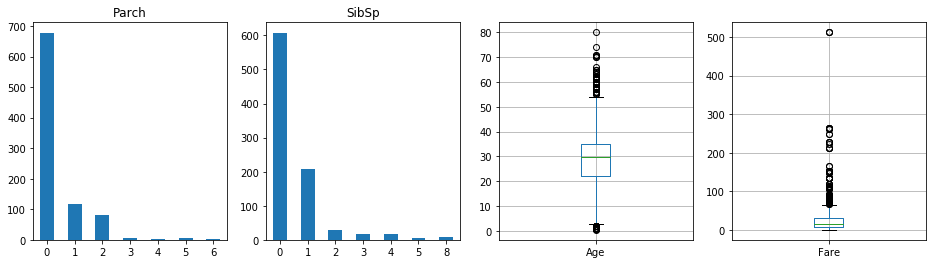

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
hdf_filled.cols['Parch'].hist(ax=axs[0])
hdf_filled.cols['SibSp'].hist(ax=axs[1])
hdf_filled.cols['Age'].boxplot(ax=axs[2])
hdf_filled.cols['Fare'].boxplot(ax=axs[3])

In [12]:
hdf_fenced = hdf_filled.fence(['Age', 'Fare'])

In [13]:
hdf_fenced.fences_

{'Age': [2.5, 54.5], 'Fare': [-26.0105, 64.4063]}

In [14]:
fencer = hdf_fenced.transformers.fencer()
fencer.getDictValues()

{'Age': [2.5, 54.5], 'Fare': [-26.0105, 64.4063]}

In [15]:
hdf_fenced.cols[:][:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,64.4063,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,None,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,None,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.500000,3,1,349909,21.0750,None,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,None,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,None,C


In [16]:
hdf_fenced.cols['categorical'].nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
SibSp            7
Parch            7
Ticket         681
Cabin          147
Embarked         3
dtype: int64

In [17]:
hdf_fenced.stratify(['Pclass']).cols['Cabin'].nunique()

Pclass  0    
1       Cabin    133
2       Cabin      7
3       Cabin      7
Name: nunique, dtype: int64

In [18]:
hdf_fenced.cols['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

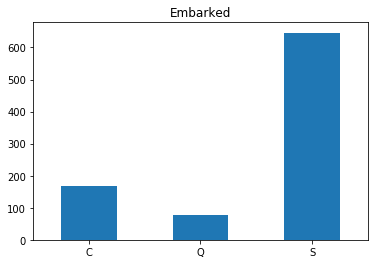

In [19]:
hdf_fenced.cols['Embarked'].hist()

In [20]:
hdf_fenced.stratify(['Pclass']).cols['Embarked'].value_counts()

Pclass  Embarked
1       C            85
        Q             2
        S           129
2       C            17
        Q             3
        S           164
3       C            66
        Q            72
        S           353
Name: value_counts, dtype: int64

In [21]:
hdf_fenced.stratify(['Pclass', Bucket('Age', 3)]).cols['Embarked'].value_counts()

Pclass  Age                                Embarked
1       Age >= 19.8333 and Age < 37.1667   C            42
                                           Q             1
                                           S            60
        Age >= 2.5000 and Age < 19.8333    C             7
                                           S            14
        Age >= 37.1667 and Age <= 54.5000  C            36
                                           Q             1
                                           S            55
2       Age >= 19.8333 and Age < 37.1667   C            13
                                           Q             2
                                           S            93
        Age >= 2.5000 and Age < 19.8333    C             4
                                           S            31
        Age >= 37.1667 and Age <= 54.5000  Q             1
                                           S            40
3       Age >= 19.8333 and Age < 37.1667   C            45
    

In [22]:
hdf.stratify(['Pclass']).cols['continuous'].mean()

Pclass  index
1       Age      38.2334
        Fare     84.1547
2       Age      29.8776
        Fare     20.6622
3       Age      25.1406
        Fare     13.6756
Name: mean, dtype: object

In [23]:
correlations = hdf_fenced.cols[:].corr()
correlations

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035533,-0.057527,-0.001652,0.003194
Survived,-0.005007,1.000000,-0.338481,-0.065857,-0.035322,0.081629,0.317632
Pclass,-0.035144,-0.338481,1.000000,-0.330962,0.083081,0.018443,-0.715974
Age,0.035533,-0.065857,-0.330962,1.000000,-0.238735,-0.186087,0.137207
SibSp,-0.057527,-0.035322,0.083081,-0.238735,1.000000,0.414838,0.333246
Parch,-0.001652,0.081629,0.018443,-0.186087,0.414838,1.000000,0.294522
Fare,0.003194,0.317632,-0.715974,0.137207,0.333246,0.294522,1.000000


In [25]:
hdf_fenced.stratify(['Pclass']).cols[:].corr()

Age      Fare     Parch  PassengerId     SibSp  \
Pclass index                                                              
1      Age          1.000000 -0.176296 -0.223670     0.003282 -0.070599   
       Fare        -0.176296  1.000000  0.333182    -0.136571  0.438296   
       Parch       -0.223670  0.333182  1.000000    -0.026157  0.261954   
       PassengerId  0.003282 -0.136571 -0.026157     1.000000 -0.055167   
       SibSp       -0.070599  0.438296  0.261954    -0.055167  1.000000   
       Survived    -0.193269  0.311507  0.062565     0.159824  0.162276   
2      Age          1.000000 -0.189600 -0.300334     0.039859 -0.205432   
       Fare        -0.189600  1.000000  0.412222     0.027618  0.560837   
       Parch       -0.300334  0.412222  1.000000     0.077052  0.326626   
       PassengerId  0.039859  0.027618  0.077052     1.000000  0.079737   
       SibSp       -0.205432  0.560837  0.326626     0.079737  1.000000   
       Survived    -0.262666  0.124435  0.361793    -0.026030  0.145340   
3      Age          1.000000 -0.180821 -0.146280     0.029538 -0.305892   
       Fare        -0.180821  1.000000  0.590924     0.001080  0.754108   
       Parch       -0.146280  0.590924  1.000000    -0.014438  0.464733   
       PassengerId  0.029538  0.001080 -0.014438     1.000000 -0.080127   
       SibSp       -0.305892  0.754108  0.464733    -0.080127  1.000000   
       Survived    -0.167906  0.004586  0.017257    -0.096550 -0.073339   

                    Survived  
Pclass index                  
1      Age         -0.193269  
       Fare         0.311507  
       Parch        0.062565  
       PassengerId  0.159824  
       SibSp        0.162276  
       Survived     1.000000  
2      Age         -0.262666  
       Fare         0.124435  
       Parch        0.361793  
       PassengerId -0.026030  
       SibSp        0.145340  
       Survived     1.000000  
3      Age         -0.167906  
       Fare         0.004586  
       Parch        0.017257  
       PassengerId -0.096550  
       SibSp       -0.073339  
       Survived     1.000000

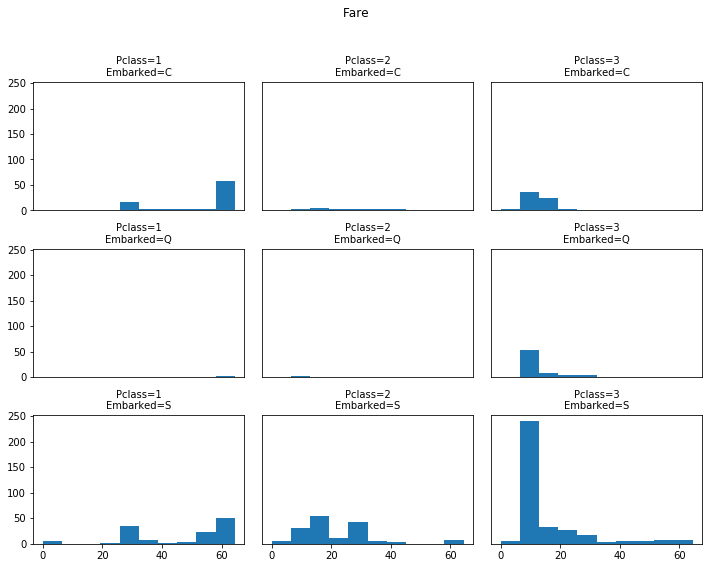

In [26]:
fig, axs = hdf_fenced.stratify(['Pclass', 'Embarked']).cols['Fare'].hist(figsize=(10, 8))

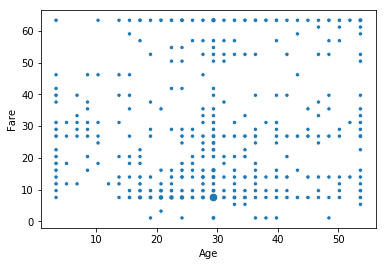

In [27]:
hdf_fenced.cols[['Age', 'Fare']].scatterplot()

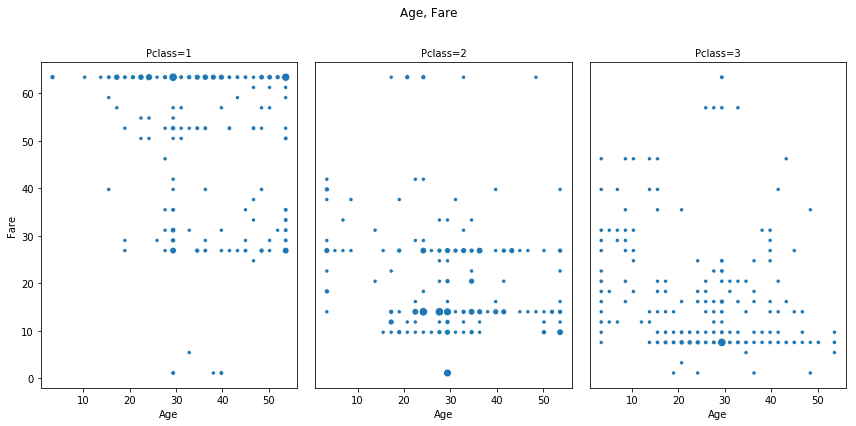

In [28]:
fig, axs = hdf_fenced.stratify(['Pclass']).cols[['Age', 'Fare']].scatterplot(figsize=(12, 6))

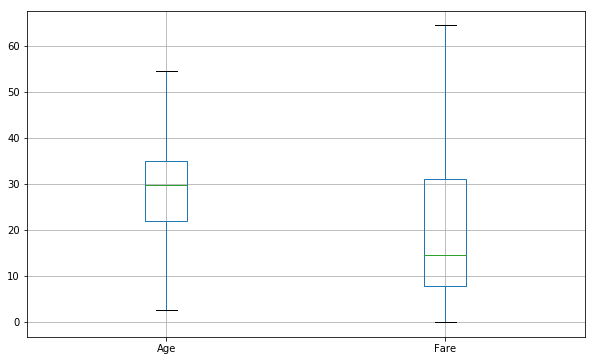

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
hdf_fenced.cols[['Age', 'Fare']].boxplot(ax=ax)

In [30]:
import numpy as np
hdf2 = hdf_fenced.assign(logFare=lambda Fare: np.log(Fare + 1))

In [31]:
hdf2.cols[['PassengerId', 'Fare', 'logFare']][:5]

,PassengerId,Fare,logFare
0,1,7.2500,2.110213
1,2,64.4063,4.180619
2,3,7.9250,2.188856
3,4,53.1000,3.990834
4,5,8.0500,2.202765


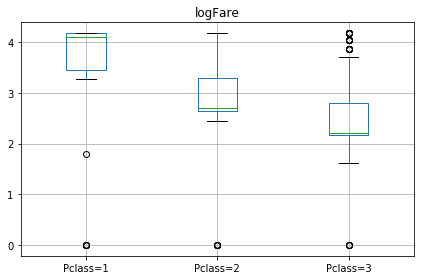

In [33]:
fig, axs = hdf2.stratify(['Pclass']).cols['logFare'].boxplot()

In [34]:
col_mr = hdf_fenced.pandas['Name'].str.find(sub='Mr.')
col_mr

Column<b'udf(Name) AS `<lambda>(Name,)`'>

In [35]:
hdf_fenced.assign(pos_mr=col_mr > 0).show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|pos_mr|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|  true|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|64.4063|  C85|       C| false|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S| false|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S| false|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|  true|
+-----------+--------+--